# Loading the Reuters dataset

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
 num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

 # Decoding newswires back to text


In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
 [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Instead of using a slice, you can use a loop to access items within a key range.
for key in range(10, 21): # Loop through the desired key range (10 to 20 inclusive)
    if key in reverse_word_index: # Check if the key exists in the dictionary
        print(f"Key: {key}, Value: {reverse_word_index[key]}") # Print the key and value

Key: 10, Value: for
Key: 11, Value: vs
Key: 12, Value: dlrs
Key: 13, Value: it
Key: 14, Value: reuter
Key: 15, Value: 000
Key: 16, Value: 1
Key: 17, Value: pct
Key: 18, Value: on
Key: 19, Value: from
Key: 20, Value: is


In [ ]:
train_labels[10]

3

# Encoding the input data

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    """
    Vectorizes the sequences (list of word indices) into a binary matrix.

    Args:
        sequences: A list of sequences (each sequence is a list of word indices).
        dimension: The size of the vocabulary (number of unique words).

    Returns:
        A NumPy array representing the vectorized sequences.
    """
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Now you can call the function:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Encoding the labels

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.  # This line should be indented
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# Building your model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

#Compiling the model

In [ ]:
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

#Setting aside a validation set

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

# Training the model

In [ ]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.3379 - loss: 3.1961 - val_accuracy: 0.6180 - val_loss: 1.8634
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6724 - loss: 1.6420 - val_accuracy: 0.6970 - val_loss: 1.3906
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7363 - loss: 1.2297 - val_accuracy: 0.7250 - val_loss: 1.2062
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.7894 - loss: 0.9812 - val_accuracy: 0.7650 - val_loss: 1.0812
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.8256 - loss: 0.8134 - val_accuracy: 0.7820 - val_loss: 1.0086
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8606 - loss: 0.6651 - val_accuracy: 0.8040 - val_loss: 0.9619
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8820 - loss: 0.5654 - val_accuracy: 0.8120 - val_loss: 0.9225
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9105 - loss: 0.4640 - val_accuracy: 0.8130 - v

#Plotting the training and validation loss

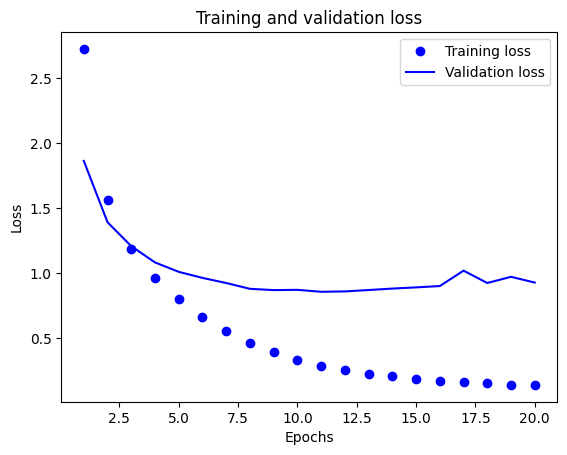

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting the training and validation accuracy

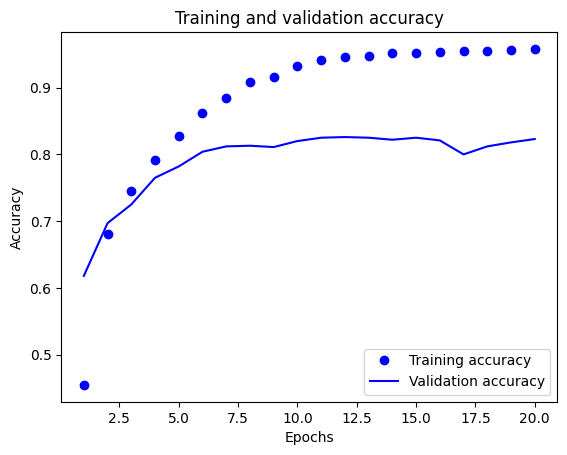

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Retraining a model from scratch

In [ ]:
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])
model.fit(x_train,
 y_train,
 epochs=9,
 batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.4012 - loss: 3.2263
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6579 - loss: 1.6103
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7472 - loss: 1.1661
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7985 - loss: 0.9470
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.8339 - loss: 0.7803
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.8563 - loss: 0.6546
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8803 - loss: 0.5546
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.8975 - loss: 0.4645
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9222 - loss: 0.3771
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7946 - loss: 0.9077


In [ ]:
 results

[0.9203615784645081, 0.7880676984786987]

In [ ]:
# we use the copy of data to prevent orginal data from shapal
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19634906500445237

#Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
predictions[0].shape
(46,)

(46,)

In [ ]:
 np.sum(predictions[0])


1.0000001

In [ ]:
np.argmax(predictions[0])

3

#A different way to handle the labels and the loss

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

#The importance of having sufficiently large intermediate layers
#  A model with an information bottleneck


In [ ]:
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(4, activation="relu"),
 layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])
model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=128,
 validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.1534 - loss: 3.2785 - val_accuracy: 0.4380 - val_loss: 2.0339
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5543 - loss: 1.7966 - val_accuracy: 0.6060 - val_loss: 1.5310
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6484 - loss: 1.3816 - val_accuracy: 0.6720 - val_loss: 1.3728
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7126 - loss: 1.1810 - val_accuracy: 0.6880 - val_loss: 1.3194
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7515 - loss: 1.0191 - val_accuracy: 0.6910 - val_loss: 1.2991
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7575 - loss: 0.9512 - val_accuracy: 0.6910 - val_loss: 1.2792
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7651 - loss: 0.8743 - val_accuracy: 0.7040 - val_loss: 1.2621
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7749 - loss: 0.8321 - val_accuracy: 0.7050 - v

In [ ]:
n1="Liverpool secured a significant 2-0 win against Manchester City, showcasing stellar performances by Mohamed Salah and Cody Gakpo. This keeps Liverpool's season momentum strong"

In [ ]:
tokens=n1.split(" ")

In [ ]:
tokens

['Liverpool',
 'secured',
 'a',
 'significant',
 '2-0',
 'win',
 'against',
 'Manchester',
 'City,',
 'showcasing',
 'stellar',
 'performances',
 'by',
 'Mohamed',
 'Salah',
 'and',
 'Cody',
 'Gakpo.',
 'This',
 'keeps',
 "Liverpool's",
 'season',
 'momentum',
 'strong']

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(tokens)
# vectorizer.get_feature_names_out()
# print(X.toarray())

In [ ]:
# # X

# import numpy as np
# from sklearn.feature_extraction.text import CountVectorizer

# n1 = "Liverpool secured a significant 2-0 win against Manchester City, showcasing stellar performances by Mohamed Salah and Cody Gakpo. This keeps Liverpool's season momentum strong"
# tokens = n1.split(" ")

# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(tokens)

# print(vectorizer.get_feature_names_out())
# print(X.toarray())

In [ ]:
# vectorizer.get_feature_names_out()

In [ ]:
# it is the Number assign to vocabulary is assign from sciket learn vocabulary but acutal the number is Assign is not correct beacuse the
# Reuters dataset set use other vacabulary for example the number 20 is for win in sklearn vacabulary but reuter 20 asssign to sports so ther
# is beg diffrence so the result is show is wrong
# vectorizer.vocabulary_

In [ ]:
# vectorizer.vocabulary_.values()

# So We Use the its OWN vacabulary of the Data sets

In [ ]:
news_vector=[]

In [ ]:
word_index = reuters.get_word_index()


In [ ]:
len(word_index)

30979

In [ ]:
for token in tokens:
    if token in word_index:
      news_vector.append(word_index[token])
      print(word_index[token])

4002
7
919
3682
109
9955
24
6
9547
757
3505
467


In [ ]:
print(word_index["token"])

10414


In [ ]:
news_vector

[4002, 7, 919, 3682, 109, 9955, 24, 6, 9547, 757, 3505, 467]

In [ ]:
vectorize_sequences(news_vector)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
model.predict(vectorize_sequences(news_vector))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0.01102621, 0.01949721, 0.00612458, 0.04114305, 0.05917656,
        0.00473016, 0.0238718 , 0.02120888, 0.03226861, 0.00840352,
        0.01455599, 0.02381771, 0.02615911, 0.01576703, 0.01430849,
        0.0076581 , 0.02839943, 0.01842507, 0.0309188 , 0.03467308,
        0.03958005, 0.03828729, 0.00738037, 0.02659299, 0.05539306,
        0.019877  , 0.00278728, 0.02590075, 0.030821  , 0.0166878 ,
        0.03492064, 0.02304591, 0.02741473, 0.01074166, 0.01414511,
        0.01077438, 0.03515215, 0.01213112, 0.02595779, 0.01006246,
        0.01731064, 0.02394062, 0.0096839 , 0.02586076, 0.00563205,
        0.00778516],
       [0.01726854, 0.03341346, 0.0094847 , 0.04667098, 0.05798419,
        0.00965205, 0.01178954, 0.02756109, 0.02001014, 0.0162464 ,
        0.02283682, 0.03681223, 0.01958625, 0.01619104, 0.02129737,
        0.01032163, 0.02518574, 0.01097749, 0.03465585, 0.0352142 ,
        0.03015021, 0.02598225, 0.00786514, 0.02058167, 0.06698842,
        0.02333836, 0.00567

In [ ]:
model.predict(vectorize_sequences(news_vector)).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


509

In [ ]:
def newclassifier(n1):
  tokens=n1.split(" ")
  news_vector=[]
  for token in tokens:
    if token in word_index:
      news_vector.append(word_index[token])
      vectorize_sequences(news_vector)
  return model.predict(vectorize_sequences(news_vector)).argmax()

In [ ]:
newclassifier(n1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


509

In [ ]:
model.save("my_model.h5")

In [ ]:
model.save('my_model.keras')

In [ ]:
newclassifier("Gus Atkinson's Hat-Trick: England's Gus Atkinson achieved a historic hat-trick against New Zealand in the second Test in Wellington")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


233

In [ ]:
newclassifier("Lionel Messi Wins MLS MVP: Lionel Messi was awarded the MLS Most Valuable Player for his exceptional season​")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


95